# End-to-End Housing Prediction Model

This was inspired by the *hands-on machine learning with scikit-learn keras and tensorflow 3rd edition* based on the califonia housing prediction model. The purpose of this project is to enstill the fundamentals of machine learning. For instance cleaning data, and training predcition models.

# Setup/Cleaning Data

In [1]:
import pandas
import numpy as np
dataSet = pandas.read_csv('nyc-property-sales.csv')
dataSet

C:\Users\Owner\AppData\Local\Temp\ipykernel_22168\62311364.py:3: DtypeWarning: Columns (0,4,5,6,10,11,12,13,14,15,16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  dataSet = pandas.read_csv('nyc-property-sales.csv')


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,46,NaN,A4,347 EAST 4TH STREET,NaN,...,1.0,0.0,1.0,2116.0,4400.0,1900.0,1,A4,399000,2022-09-29 00:00:00
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,1,NaN,S2,110 AVENUE C,NaN,...,2.0,1.0,3.0,1502.0,2790.0,1901.0,1,S2,2999999,2022-09-15 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,16,NaN,C1,326 EAST 4TH STREET,NaN,...,10.0,0.0,10.0,2204.0,8625.0,1899.0,2,C1,16800000,2022-08-04 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,17,NaN,C1,328 EAST 4TH STREET,NaN,...,10.0,0.0,10.0,2204.0,8625.0,1900.0,2,C1,16800000,2022-08-04 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,54,NaN,C4,"719 EAST SIXTH STREET, 1B",NaN,...,20.0,0.0,20.0,2302.0,9750.0,1900.0,2,C4,158822,2022-09-27 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018044,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,84,NaN,A1,N/A LENEVAR AVENUE,NaN,...,1.0,0.0,1.0,2603.0,0.0,2022.0,1,V0,1116638,2022-12-19 00:00:00
2018045,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,85,NaN,A1,N/A LENEVAR AVENUE,NaN,...,1.0,0.0,1.0,2551.0,0.0,NaN,1,V0,1116638,2022-12-19 00:00:00
2018046,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,86,NaN,V0,N/A LENEVAR AVENUE,NaN,...,0.0,0.0,0.0,2597.0,0.0,2023.0,1,V0,1116638,2022-12-19 00:00:00
2018047,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,87,NaN,V0,96 LENEVAR AVENUE,NaN,...,0.0,0.0,0.0,2644.0,0.0,2023.0,1,V0,1116638,2022-12-19 00:00:00


*The dataset has issues with mixed data types this is an issue we resolve later on the notebook

In [2]:
dataSet.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,46,NaN,A4,347 EAST 4TH STREET,NaN,...,1.0,0.0,1.0,2116.0,4400.0,1900.0,1,A4,399000,2022-09-29 00:00:00
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,1,NaN,S2,110 AVENUE C,NaN,...,2.0,1.0,3.0,1502.0,2790.0,1901.0,1,S2,2999999,2022-09-15 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,16,NaN,C1,326 EAST 4TH STREET,NaN,...,10.0,0.0,10.0,2204.0,8625.0,1899.0,2,C1,16800000,2022-08-04 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,17,NaN,C1,328 EAST 4TH STREET,NaN,...,10.0,0.0,10.0,2204.0,8625.0,1900.0,2,C1,16800000,2022-08-04 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,54,NaN,C4,"719 EAST SIXTH STREET, 1B",NaN,...,20.0,0.0,20.0,2302.0,9750.0,1900.0,2,C4,158822,2022-09-27 00:00:00


First drop any uneeded columns, I want to focus on the more quantitative side of the data

In [3]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018049 entries, 0 to 2018048
Data columns (total 21 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   BOROUGH                         object
 1   NEIGHBORHOOD                    object
 2   BUILDING CLASS CATEGORY         object
 3   TAX CLASS AT PRESENT            object
 4   BLOCK                           object
 5   LOT                             object
 6   EASE-MENT                       object
 7   BUILDING CLASS AT PRESENT       object
 8   ADDRESS                         object
 9   APARTMENT NUMBER                object
 10   ZIP CODE                       object
 11  RESIDENTIAL UNITS               object
 12  COMMERCIAL UNITS                object
 13  TOTAL UNITS                     object
 14  LAND SQUARE FEET                object
 15  GROSS SQUARE FEET               object
 16  YEAR BUILT                      object
 17  TAX CLASS AT TIME OF SALE       object
 18  BU

In [4]:
#Droping the columns located axis 1
cleaned_dataSet = dataSet.drop([' ZIP CODE','APARTMENT NUMBER','EASE-MENT','LOT','GROSS SQUARE FEET','LAND SQUARE FEET'], axis=1)
cleaned_dataSet.info()
print(cleaned_dataSet.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018049 entries, 0 to 2018048
Data columns (total 15 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   BOROUGH                         object
 1   NEIGHBORHOOD                    object
 2   BUILDING CLASS CATEGORY         object
 3   TAX CLASS AT PRESENT            object
 4   BLOCK                           object
 5   BUILDING CLASS AT PRESENT       object
 6   ADDRESS                         object
 7   RESIDENTIAL UNITS               object
 8   COMMERCIAL UNITS                object
 9   TOTAL UNITS                     object
 10  YEAR BUILT                      object
 11  TAX CLASS AT TIME OF SALE       object
 12  BUILDING CLASS AT TIME OF SALE  object
 13  SALE PRICE                      object
 14  SALE DATE                       object
dtypes: object(15)
memory usage: 230.9+ MB
['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'BUILDIN

In [5]:
cleaned_dataSet = cleaned_dataSet.dropna()
cleaned_dataSet = cleaned_dataSet[cleaned_dataSet['BUILDING CLASS CATEGORY'].str.contains('dwellings|apartments', case=False, na=False)]

In [6]:
#I want to convert some of the Dtypes
cleaned_dataSet['BOROUGH'] = pandas.to_numeric(cleaned_dataSet['BOROUGH'], errors='coerce').astype('int64')
cleaned_dataSet['BLOCK'] = pandas.to_numeric(cleaned_dataSet['BLOCK'], errors='coerce').astype('int64')
cleaned_dataSet['YEAR BUILT'] = pandas.to_numeric(cleaned_dataSet['YEAR BUILT'], errors='coerce').astype('int64')
cleaned_dataSet['RESIDENTIAL UNITS'] = pandas.to_numeric(cleaned_dataSet['RESIDENTIAL UNITS'], errors='coerce').astype('int64')
cleaned_dataSet['COMMERCIAL UNITS'] = pandas.to_numeric(cleaned_dataSet['COMMERCIAL UNITS'], errors='coerce').astype('int64')
cleaned_dataSet['TOTAL UNITS'] = pandas.to_numeric(cleaned_dataSet['TOTAL UNITS'], errors='coerce').astype('int64')
cleaned_dataSet['SALE PRICE'] = pandas.to_numeric(
    cleaned_dataSet['SALE PRICE'], errors='coerce'
).astype('Int64')
cleaned_dataSet['SALE DATE'] = pandas.to_datetime(
    cleaned_dataSet['SALE DATE'], errors='coerce'
)

See I want to note the duplicate I had made with the columns. I have to drop some of them

In [7]:
cleaned_dataSet.info()
print(cleaned_dataSet.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
Index: 1064663 entries, 0 to 2018043
Data columns (total 15 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   BOROUGH                         1064663 non-null  int64         
 1   NEIGHBORHOOD                    1064663 non-null  object        
 2   BUILDING CLASS CATEGORY         1064663 non-null  object        
 3   TAX CLASS AT PRESENT            1064663 non-null  object        
 4   BLOCK                           1064663 non-null  int64         
 5   BUILDING CLASS AT PRESENT       1064663 non-null  object        
 6   ADDRESS                         1064663 non-null  object        
 7   RESIDENTIAL UNITS               1064663 non-null  int64         
 8   COMMERCIAL UNITS                1064663 non-null  int64         
 9   TOTAL UNITS                     1064663 non-null  int64         
 10  YEAR BUILT                      1064663 non-nul

# How should we look at the data?
Because sure it's great we have a lot of data but we should take a sample of it. If we were to look at the entire set then that creates problem in finding an accurate prediction.

In [8]:
##Let's just examine it from 2021 - 2023. Considering the pandemic started that time. So I am going to limit it based on the SALES DATE
cleaned_dataSet_from_21_to_23 = cleaned_dataSet[cleaned_dataSet['SALE DATE'] >= '2021-01-01']
#cleaned_dataSet_from_21_to_23 = cleaned_dataSet_from_21_to_23.sort_values(by='SALE DATE', ascending=True)

In [9]:
cleaned_dataSet_from_21_to_23.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,A4,347 EAST 4TH STREET,1,0,1,1900,1,A4,399000,2022-09-29
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,S2,110 AVENUE C,2,1,3,1901,1,S2,2999999,2022-09-15
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,C1,326 EAST 4TH STREET,10,0,10,1899,2,C1,16800000,2022-08-04
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,C1,328 EAST 4TH STREET,10,0,10,1900,2,C1,16800000,2022-08-04
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,C4,"719 EAST SIXTH STREET, 1B",20,0,20,1900,2,C4,158822,2022-09-27


In [10]:
cleaned_dataSet_from_21_to_23.info()
cleaned_dataSet_from_21_to_23.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 184118 entries, 0 to 2018043
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   BOROUGH                         184118 non-null  int64         
 1   NEIGHBORHOOD                    184118 non-null  object        
 2   BUILDING CLASS CATEGORY         184118 non-null  object        
 3   TAX CLASS AT PRESENT            184118 non-null  object        
 4   BLOCK                           184118 non-null  int64         
 5   BUILDING CLASS AT PRESENT       184118 non-null  object        
 6   ADDRESS                         184118 non-null  object        
 7   RESIDENTIAL UNITS               184118 non-null  int64         
 8   COMMERCIAL UNITS                184118 non-null  int64         
 9   TOTAL UNITS                     184118 non-null  int64         
 10  YEAR BUILT                      184118 non-null  int64      

,BOROUGH,BLOCK,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,SALE PRICE,SALE DATE
count,184118.000000,184118.000000,184118.000000,184118.000000,184118.000000,184118.000000,184118.0,184118
mean,3.557860,5533.971453,3.925667,0.057789,3.983456,1941.836301,837811.753658,2022-08-19 19:14:52.501548032
min,1.000000,3.000000,0.000000,0.000000,0.000000,1800.000000,0.0,2021-01-01 00:00:00
25%,3.000000,2730.000000,1.000000,0.000000,1.000000,1920.000000,0.0,2021-12-20 00:00:00
50%,4.000000,5068.000000,2.000000,0.000000,2.000000,1931.000000,509250.0,2022-10-07 00:00:00
75%,4.000000,7750.750000,2.000000,0.000000,2.000000,1960.000000,899000.0,2023-04-25 00:00:00
max,5.000000,16323.000000,1272.000000,25.000000,1272.000000,2023.000000,837000000.0,2023-11-30 00:00:00
std,1.005222,3692.867193,22.055625,0.370700,22.182688,30.652950,5508173.286163,NaN


Now I just want to remove any duplicates in this data

In [11]:
sum(cleaned_dataSet_from_21_to_23.duplicated())

46091

In [12]:
cleaned_dataSet_from_21_to_23 = cleaned_dataSet_from_21_to_23.drop_duplicates()
sum(cleaned_dataSet_from_21_to_23.duplicated())

0

In [13]:
cleaned_dataSet_from_21_to_23 = cleaned_dataSet_from_21_to_23[cleaned_dataSet_from_21_to_23['BUILDING CLASS CATEGORY'].str.contains('dwellings|apartments', case=False, na=False)]

In [14]:
cleaned_dataSet_from_21_to_23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138027 entries, 0 to 1944597
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   BOROUGH                         138027 non-null  int64         
 1   NEIGHBORHOOD                    138027 non-null  object        
 2   BUILDING CLASS CATEGORY         138027 non-null  object        
 3   TAX CLASS AT PRESENT            138027 non-null  object        
 4   BLOCK                           138027 non-null  int64         
 5   BUILDING CLASS AT PRESENT       138027 non-null  object        
 6   ADDRESS                         138027 non-null  object        
 7   RESIDENTIAL UNITS               138027 non-null  int64         
 8   COMMERCIAL UNITS                138027 non-null  int64         
 9   TOTAL UNITS                     138027 non-null  int64         
 10  YEAR BUILT                      138027 non-null  int64      

In [15]:
cleaned_dataSet_from_21_to_23.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,A4,347 EAST 4TH STREET,1,0,1,1900,1,A4,399000,2022-09-29
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,S2,110 AVENUE C,2,1,3,1901,1,S2,2999999,2022-09-15
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,C1,326 EAST 4TH STREET,10,0,10,1899,2,C1,16800000,2022-08-04
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,C1,328 EAST 4TH STREET,10,0,10,1900,2,C1,16800000,2022-08-04
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,C4,"719 EAST SIXTH STREET, 1B",20,0,20,1900,2,C4,158822,2022-09-27


BOROUGH is more of a qualitative type of data rather than quantatitive. So I first am going to generate a new column with the names of the BOROUGH.

In [16]:
cleaned_dataSet_from_21_to_23 = cleaned_dataSet_from_21_to_23.copy()  # Make a copy to avoid view issues

cleaned_dataSet_from_21_to_23['BOROUGH_NAME'] = (
    cleaned_dataSet_from_21_to_23['BOROUGH']
    .astype(str)
    .replace({'1': 'Manhattan', 
              '2': 'Bronx', 
              '3': 'Brooklyn', 
              '4': 'Queens', 
              '5': 'Staten Island'})
)

cleaned_dataSet_from_21_to_23.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,A4,347 EAST 4TH STREET,1,0,1,1900,1,A4,399000,2022-09-29,Manhattan
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,S2,110 AVENUE C,2,1,3,1901,1,S2,2999999,2022-09-15,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,C1,326 EAST 4TH STREET,10,0,10,1899,2,C1,16800000,2022-08-04,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,C1,328 EAST 4TH STREET,10,0,10,1900,2,C1,16800000,2022-08-04,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,C4,"719 EAST SIXTH STREET, 1B",20,0,20,1900,2,C4,158822,2022-09-27,Manhattan


Now let's take the sale prices and output a consice value in the millions $

In [17]:
cleaned_dataSet_from_21_to_23['SALE_PRICE($mil)'] = cleaned_dataSet_from_21_to_23['SALE PRICE'].astype(np.float64)/ 100000
cleaned_dataSet_from_21_to_23.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME,SALE_PRICE($mil)
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,A4,347 EAST 4TH STREET,1,0,1,1900,1,A4,399000,2022-09-29,Manhattan,3.99000
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,S2,110 AVENUE C,2,1,3,1901,1,S2,2999999,2022-09-15,Manhattan,29.99999
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,C1,326 EAST 4TH STREET,10,0,10,1899,2,C1,16800000,2022-08-04,Manhattan,168.00000
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,C1,328 EAST 4TH STREET,10,0,10,1900,2,C1,16800000,2022-08-04,Manhattan,168.00000
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,C4,"719 EAST SIXTH STREET, 1B",20,0,20,1900,2,C4,158822,2022-09-27,Manhattan,1.58822


Lastly we want to know the month and year this property was sold for

In [18]:
cleaned_dataSet_from_21_to_23['SALE DATE'] = pandas.to_datetime(cleaned_dataSet_from_21_to_23['SALE DATE'])
cleaned_dataSet_from_21_to_23['SALE_MONTH']= cleaned_dataSet_from_21_to_23['SALE DATE'].dt.month
cleaned_dataSet_from_21_to_23['SALE_YEAR']= cleaned_dataSet_from_21_to_23['SALE DATE'].dt.year
cleaned_dataSet_from_21_to_23.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME,SALE_PRICE($mil),SALE_MONTH,SALE_YEAR
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,A4,347 EAST 4TH STREET,1,0,1,1900,1,A4,399000,2022-09-29,Manhattan,3.99000,9,2022
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,S2,110 AVENUE C,2,1,3,1901,1,S2,2999999,2022-09-15,Manhattan,29.99999,9,2022
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,C1,326 EAST 4TH STREET,10,0,10,1899,2,C1,16800000,2022-08-04,Manhattan,168.00000,8,2022
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,C1,328 EAST 4TH STREET,10,0,10,1900,2,C1,16800000,2022-08-04,Manhattan,168.00000,8,2022
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,C4,"719 EAST SIXTH STREET, 1B",20,0,20,1900,2,C4,158822,2022-09-27,Manhattan,1.58822,9,2022


In [19]:
#How do i count for each unique type of building class catergory
building_counts = cleaned_dataSet_from_21_to_23["BUILDING CLASS CATEGORY"].value_counts()

print(building_counts)

BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS             61570
02 TWO FAMILY DWELLINGS             51107
03 THREE FAMILY DWELLINGS           13991
07 RENTALS - WALKUP APARTMENTS       9677
08 RENTALS - ELEVATOR APARTMENTS     1682
Name: count, dtype: int64


## Checkking for relationship and correlations

In [20]:
cleaned_dataSet_from_21_to_23.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'BUILDING CLASS AT PRESENT', 'ADDRESS',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'BOROUGH_NAME', 'SALE_PRICE($mil)',
       'SALE_MONTH', 'SALE_YEAR'],
      dtype='object')

In [21]:
correlation = cleaned_dataSet_from_21_to_23.select_dtypes(include=['number']).corr().abs()
correlation

,BOROUGH,BLOCK,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,SALE PRICE,SALE_PRICE($mil),SALE_MONTH,SALE_YEAR
BOROUGH,1.000000,0.141287,0.196029,0.176088,0.198039,0.326937,0.109025,0.109025,0.030222,0.003040
BLOCK,0.141287,1.000000,0.112473,0.098198,0.113575,0.067231,0.065429,0.065429,0.017170,0.004676
RESIDENTIAL UNITS,0.196029,0.112473,1.000000,0.321546,0.999854,0.090844,0.302105,0.302105,0.028765,0.034037
COMMERCIAL UNITS,0.176088,0.098198,0.321546,1.000000,0.337670,0.031425,0.189289,0.189289,0.016270,0.017112
TOTAL UNITS,0.198039,0.113575,0.999854,0.337670,1.000000,0.089737,0.303723,0.303723,0.028888,0.034143
YEAR BUILT,0.326937,0.067231,0.090844,0.031425,0.089737,1.000000,0.000562,0.000562,0.003125,0.006541
SALE PRICE,0.109025,0.065429,0.302105,0.189289,0.303723,0.000562,1.000000,1.000000,0.013899,0.001254
SALE_PRICE($mil),0.109025,0.065429,0.302105,0.189289,0.303723,0.000562,1.000000,1.000000,0.013899,0.001254
SALE_MONTH,0.030222,0.017170,0.028765,0.016270,0.028888,0.003125,0.013899,0.013899,1.000000,0.136808
SALE_YEAR,0.003040,0.004676,0.034037,0.017112,0.034143,0.006541,0.001254,0.001254,0.136808,1.000000


Though a bit unclear and hard to read I do see some correlations that can be used for machine learning and data representations.
Let's make it more readable.

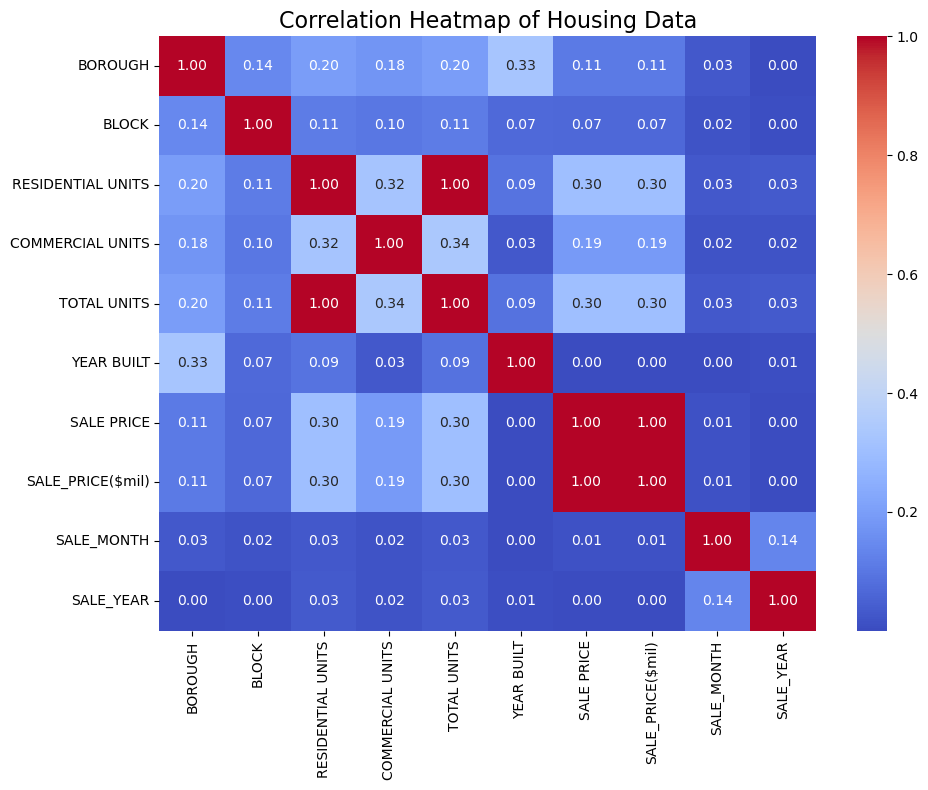

In [22]:
import seaborn as sb
import matplotlib.pyplot as plt

correlation = cleaned_dataSet_from_21_to_23.select_dtypes(include=['number']).corr().abs()

#Formatting and heapmap
plt.figure(figsize=(10, 8))
sb.heatmap(
    correlation, 
    annot=True,        # shows the numbers
    cmap="coolwarm",   # color scheme
    fmt=".2f",         # number format
    cbar=True          # show color bar
)

plt.title("Correlation Heatmap of Housing Data", fontsize=16)
plt.tight_layout()
plt.show()


# Data Visualizations

For clarification for myself... A unit is a part of a building. So it saying 10 units as in 10 spaces for that one building

First I want to represent the five boroughs, examining their costs and total units

Text(0, 0.5, 'millons$')

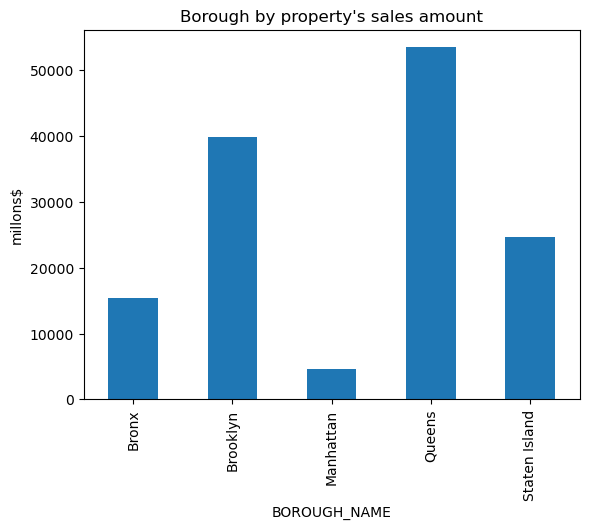

In [28]:
cleaned_dataSet_from_21_to_23['SALE_PRICE($mil)'].groupby(cleaned_dataSet_from_21_to_23['BOROUGH_NAME']).count().plot.bar()
plt.title("Borough by property's sales amount")
plt.ylabel("millons$")

Text(0, 0.5, 'millons$')

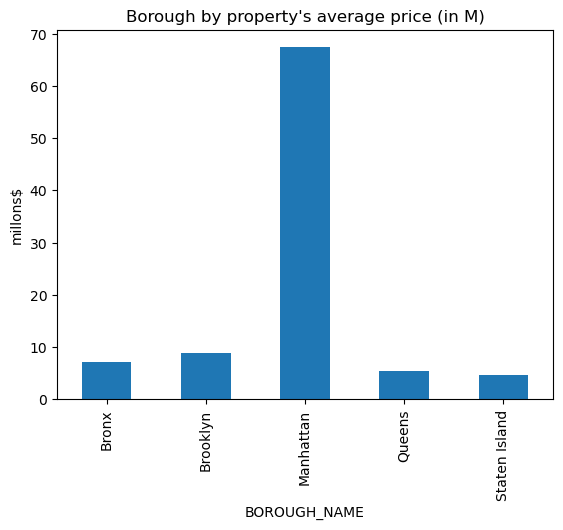

In [24]:
cleaned_dataSet_from_21_to_23['SALE_PRICE($mil)'].groupby(cleaned_dataSet_from_21_to_23['BOROUGH_NAME']).mean().plot.bar()
plt.title("Borough by property's average price (in M)")
plt.ylabel("millons$")

Text(0.5, 1.0, "Borough by residental property's in units")

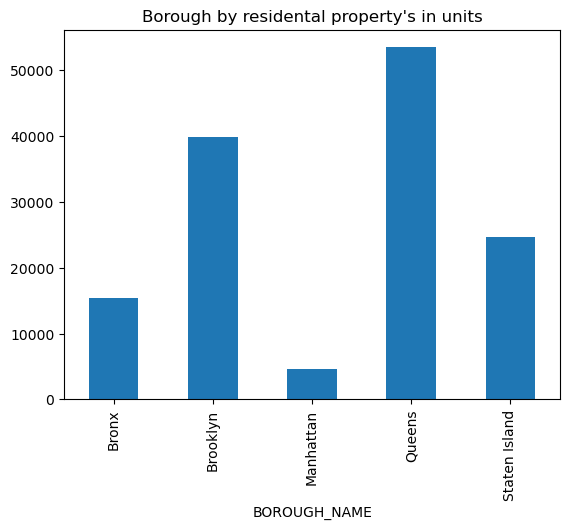

In [30]:
cleaned_dataSet_from_21_to_23['RESIDENTIAL UNITS'].groupby(cleaned_dataSet_from_21_to_23['BOROUGH_NAME']).count().plot.bar()
plt.title("Borough by residental property's in units")

*This seems a bit basic... I want to include the build class caterogry. So like the average selling of a 01 ONE FAMILY DWELLINGS is this amount and soforth.

In [26]:
# Group by Borough and Building Class Category
counts_by_borough = cleaned_dataSet_from_21_to_23.groupby(["BOROUGH_NAME", "BUILDING CLASS CATEGORY"]).size()

print(counts_by_borough)

BOROUGH_NAME   BUILDING CLASS CATEGORY         
Bronx          01 ONE FAMILY DWELLINGS              4827
               02 TWO FAMILY DWELLINGS              6551
               03 THREE FAMILY DWELLINGS            2515
               07 RENTALS - WALKUP APARTMENTS       1258
               08 RENTALS - ELEVATOR APARTMENTS      237
Brooklyn       01 ONE FAMILY DWELLINGS             10665
               02 TWO FAMILY DWELLINGS             18205
               03 THREE FAMILY DWELLINGS            6534
               07 RENTALS - WALKUP APARTMENTS       4085
               08 RENTALS - ELEVATOR APARTMENTS      346
Manhattan      01 ONE FAMILY DWELLINGS               606
               02 TWO FAMILY DWELLINGS               496
               03 THREE FAMILY DWELLINGS             260
               07 RENTALS - WALKUP APARTMENTS       2296
               08 RENTALS - ELEVATOR APARTMENTS      940
Queens         01 ONE FAMILY DWELLINGS             28532
               02 TWO FAMILY DWELLINGS  

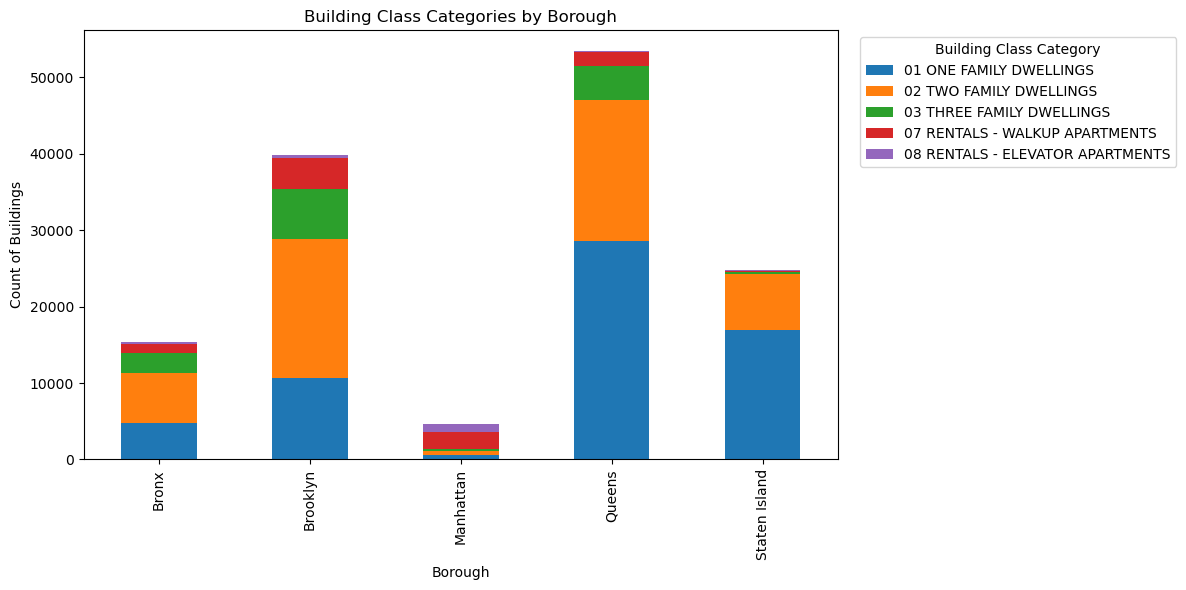

In [29]:
# Map numeric borough codes to actual names
#borough_map = {
 #   1: "Manhattan",
 #   2: "Bronx",
 #   3: "Brooklyn",
 #   4: "Queens",
 #   5: "Staten Island"
#}

#cleaned_dataSet_from_21_to_23["BOROUGH"] = cleaned_dataSet_from_21_to_23["BOROUGH_NAME"].map(borough_map)

building_class_borough = (
    cleaned_dataSet_from_21_to_23.groupby(["BOROUGH_NAME", "BUILDING CLASS CATEGORY"])
    .size()
    .reset_index(name = "Count" )
) 

pivot_counts = building_class_borough.pivot(index="BOROUGH_NAME", columns="BUILDING CLASS CATEGORY", values="Count").fillna(0)

pivot_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

plt.title("Building Class Categories by Borough")
plt.xlabel("Borough")
plt.ylabel("Count of Buildings")
plt.legend(title="Building Class Category", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

#### Analysis #1

See looking at the data representation it appears Manhattan is 
the most expensive out of the five but funny enough appears to have the least amount of residental properties.

# Machine Learning

Alright the good part! I know the goal is to predict the possible projetion prices of a certain building in a certain borough. So let's try it!